<a href="https://colab.research.google.com/github/tejask666/Tejas_INFO5731_Spring2020/blob/master/INFO5731_Assignment%20Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


(1) Features (top n-gram phrases) used for topic modeling.

Topic modeling tries to group the documents into clusters based on similar characteristics. A typical example of topic modeling is clustering a large number of newspaper articles that belong to the same category. In other words, 
cluster documents that have the same topic.

Latent Dirichlet allocation (LDA) is a topic model that generates topics based on word frequency from a set of documents. LDA is particularly useful for finding reasonably accurate mixtures of topics within a given document set.

•	Tokenizing: converting a document to its atomic elements.

•	Stopping: removing meaningless words.

•	Stemming: merging words that are equivalent in meaning.

To generate an LDA model, we need to understand how frequently each term occurs within each document. To do that, we need to construct a document-term matrix with a package called genism




(2) Top 10 clusters for topic modeling.

0.'0.027*"movie" + 0.016*"joker" + 0.010*"film" + 0.010*"like" + ' '0.007*"movies" + 0.006*"one" + 0.006*"phoenix" + 0.006*"say" + 0.006*"way" ' '+ 0.005*"good"

1.'0.017*"film" + 0.014*"joker" + 0.011*"movie" + 0.010*"shows" + '
  '0.010*"story" + 0.008*"best" + 0.008*"people" + 0.008*"society" + '
  '0.008*"perfect" + 0.007*"way"'

2.'0.011*"movie" + 0.008*"made" + 0.007*"joker" + 0.006*"like" + 0.006*"dc" + '
  '0.006*"watch" + 0.006*"history" + 0.005*"best" + 0.005*"movies" + '
  '0.004*"good"'

3.'0.029*"joker" + 0.022*"movie" + 0.008*"phoenix" + 0.008*"time" + '
  '0.008*"joaquin" + 0.008*"one" + 0.007*"character" + 0.007*"film" + '
  '0.007*"movies" + 0.007*"comic_book"'

4.'0.019*"movie" + 0.012*"went" + 0.010*"character" + 0.008*"dont" + '
  '0.008*"boring" + 0.006*"people" + 0.006*"thats" + 0.006*"time" + '
  '0.006*"different" + 0.006*"edge"'
  
5.'0.032*"movie" + 0.012*"joker" + 0.009*"like" + 0.009*"even" + '
  '0.009*"character" + 0.009*"good" + 0.008*"great" + 0.008*"many" + '
  '0.007*"feel" + 0.006*"people"'

6.'0.010*"movie" + 0.007*"joker" + 0.007*"good" + 0.007*"plot" + '
  '0.007*"really" + 0.007*"drama" + 0.005*"story" + 0.005*"time" + '
  '0.005*"need" + 0.005*"dont"'

7.'0.013*"film" + 0.013*"joker" + 0.012*"performance" + 0.008*"phoenix" + '
  '0.008*"joaquin" + 0.008*"made" + 0.005*"de" + 0.005*"talk" + '
  '0.005*"portrayal" + 0.005*"actor"'

8.'0.058*"movie" + 0.011*"people" + 0.009*"good" + 0.009*"acting" + '
  '0.009*"joker" + 0.008*"seen" + 0.007*"also" + 0.007*"one" + 0.007*"joaquin" '
  '+ 0.006*"action"'
  
9.'0.022*"movie" + 0.020*"film" + 0.014*"joker" + 0.010*"think" + 0.008*"good" '
  '+ 0.008*"people" + 0.008*"dont" + 0.008*"like" + 0.007*"bad" + '
  '0.006*"reviews"'

In [87]:
import nltk
nltk.download()
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
import csv
from nltk.tokenize import RegexpTokenizer
import pandas as pd
Excel= pd.read_csv("/content/Training and Evaluation Data .csv",encoding="ISO-8859-1")
Excel_data = Excel['Reviews for Oscar Wining Movie Joker']
Excel.head()

tk = RegexpTokenizer(r'\w+')
tokens = []
for i in Excel['Reviews for Oscar Wining Movie Joker']:
    
    tejas = i.lower()
    if(i=='spoiler content'):
      continue
    tokens.append(tokenizer.tokenize(tejas))

bigram = gensim.models.Phrases(tokens, min_count=5, threshold=100) 
trigram = gensim.models.Phrases(bigram[tokens], threshold=100) 
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
def build_bg(tokens):
    return [bigram_mod[doc] for doc in tokens]

def build_bg(tokens):
    return [trigram_mod[bigram_mod[doc]] for doc in tokens]
data_words_bigrams = make_bigrams(tokens)
data_words_trigrams=make_trigrams(data_words_bigrams)
id2word = corpora.Dictionary(data_words_trigrams)
corpus = [id2word.doc2bow(t) for t in data_words_trigrams]

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]




NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q
[(0,
  '0.027*"movie" + 0.016*"joker" + 0.010*"film" + 0.010*"like" + '
  '0.007*"movies" + 0.006*"one" + 0.006*"phoenix" + 0.006*"say" + 0.006*"way" '
  '+ 0.005*"good"'),
 (1,
  '0.017*"film" + 0.014*"joker" + 0.011*"movie" + 0.010*"shows" + '
  '0.010*"story" + 0.008*"best" + 0.008*"people" + 0.008*"society" + '
  '0.008*"perfect" + 0.007*"way"'),
 (2,
  '0.011*"movie" + 0.008*"made" + 0.007*"joker" + 0.006*"like" + 0.006*"dc" + '
  '0.006*"watch" + 0.006*"history" + 0.005*"best" + 0.005*"movies" + '
  '0.004*"good"'),
 (3,
  '0.029*"joker" + 0.022*"movie" + 0.008*"phoenix" + 0.008*"time" + '
  '0.008*"joaquin" + 0.008*"one" + 0.007*"character" + 0.007*"film" + '
  '0.007*"movies" + 0.007*"comic_book"'),
 (4,
  '0.019*"movie" + 0.012*

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

Sentiment analysis is the interpretation and classification of emotionsi.e.Positive, Negative and Neutral within text data using text analysis techniques. Sentiment analysis allows various businesses to identify customer sentiment toward products, brands or services in online conversations and feedback.

Here we are using scraped Joker movie review,ater scraping proper cleaning techniques is being applied and the depending on its reviews sentiments are decided.

# Selected Algorithms

**Logistics Regression**

Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.Instead of predicting exactly 0 or 1, logistic regression generates a probability—a value between 0 and 1, exclusive. For example, consider a logistic regression model for spam detection.

**Support Vector Machine**

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.

In [74]:
# Write your code here
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings("ignore")
df = pd.read_csv("/content/Training and Evaluation Data .csv",encoding="ISO-8859-1")
T = df['Reviews for Oscar Wining Movie Joker']
K = df['Sentiment']
T_train, T_test, K_train, K_test = train_test_split(T, K, test_size = 0.2, random_state=42)

VectorCAL = CountVectorizer(min_df=2, ngram_range=(1, 2))
T_train = VectorCAL.fit(T_train).transform(T_train) 
T_test = VectorCAL.transform(T_test)
logreg = LogisticRegression()
logreg.fit(T_train,K_train)
K_pred=logreg.predict(T_test)
print('Logistics Regression')
print("Accuracy:",metrics.accuracy_score(K_test, K_pred))
print("Precision:",metrics.precision_score(K_test, K_pred,average = 'macro'))
print("Recall:",metrics.recall_score(K_test, K_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(K_test, K_pred,average = 'macro'))

T_train, T_test, K_train, K_test = train_test_split(T, K, test_size = 0.2, random_state=42)
vect = CountVectorizer(min_df=2, ngram_range=(1, 2))
T_train = vect.fit(T_train).transform(T_train) 
T_test = vect.transform(T_test)
clf = svm.SVC(kernel='linear')
clf.fit(T_train, K_train)
K_pred = clf.predict(T_test)
print('Vector Machine')
print("Accuracy:",metrics.accuracy_score(K_test, K_pred))
print("Precision:",metrics.precision_score(K_test, K_pred,average = 'macro'))
print("Recall:",metrics.recall_score(K_test, K_pred,average = 'macro'))
print("f1 score:",metrics.f1_score(K_test, K_pred,average = 'macro'))



Logistics Regression
Accuracy: 0.85
Precision: 0.923076923076923
Recall: 0.8333333333333334
f1 score: 0.8454106280193235
Vector Machine
Accuracy: 0.75
Precision: 0.7590909090909091
Recall: 0.7666666666666666
f1 score: 0.7502645502645503


Results gathered from both algorithm on basis of Accuracy,Precision,Recall and f1 score, Logistics Regression is best suited as Accuracy is 0.85 i.e. 85 percent and value of f1 score is also higher.

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [11]:
# Write your code here
import pandas as pd
sf_train = pd.read_csv('train.csv')
sf_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
import pandas as pd
sf_test = pd.read_csv('test.csv')
sf_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
sf_train['GarageArea'].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [19]:
nulls = pd.DataFrame(sf_train.isnull().sum().sort_values(ascending=False)[:20])
nulls.columns = ['Null Count']
nulls

,Null Count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [20]:
  corr_matrix = sf.corr()
  corr_matrix["GarageArea"].sort_values(ascending=False)

GarageArea       1.000000
GarageCars       0.882475
SalePrice        0.623431
GarageYrBlt      0.564567
1stFlrSF         0.489782
TotalBsmtSF      0.486665
YearBuilt        0.478954
GrLivArea        0.468997
FullBath         0.405656
MasVnrArea       0.373066
YearRemodAdd     0.371600
TotRmsAbvGrd     0.337822
BsmtFinSF1       0.296970
Fireplaces       0.269141
OpenPorchSF      0.241435
WoodDeckSF       0.224666
BsmtUnfSF        0.183303
LotArea          0.180403
BsmtFullBath     0.179189
HalfBath         0.163549
2ndFlrSF         0.138347
BedroomAbvGr     0.065253
PoolArea         0.061047
ScreenPorch      0.051412
3SsnPorch        0.035087
MoSold           0.027974
BsmtFinSF2      -0.018227
BsmtHalfBath    -0.024536
YrSold          -0.027378
MiscVal         -0.027400
KitchenAbvGr    -0.064433
LowQualFinSF    -0.067601
MSSubClass      -0.098672
EnclosedPorch   -0.121777
Name: GarageArea, dtype: float64

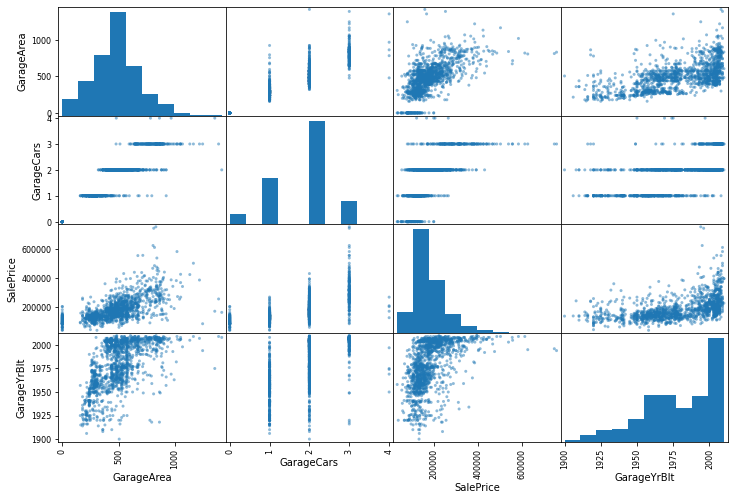

In [21]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["GarageArea", "GarageCars", "SalePrice", "GarageYrBlt"]
scatter_matrix(data_train[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

In [43]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
X_train = train.drop('GarageArea', axis=1)
y_train = train.GarageArea
X_test = sf_test
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test, = X_train.align(X_test,join='left',axis=1)
my_imputer = SimpleImputer()
X_train = my_imputer.fit_transform(X_train)
X_test = my_imputer.transform(X_test)
reg = LinearRegression()
cv_scores = cross_val_score(reg, X_train, y_train, cv=5)
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
my_submission = pd.DataFrame({'Id': sf_test.Id, 'GarageArea':predictions})
my_submission.to_csv("Housing_Price.csv")
my_submission

,Id,GarageArea
0,1461,388.810562
1,1462,220.269224
2,1463,429.362182
3,1464,444.069436
4,1465,494.793385
...,...,...
1454,2915,30.934207
1455,2916,325.730791
1456,2917,526.203198
1457,2918,-73.318325
